In [1]:
#%load_ext autoreload
#%autoreload 2

!pip3 install --quiet tensorflow-gpu==1.13.1
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet tf-sentencepiece

import tensorflow as tf
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
gitDir = "/content/gdrive/My Drive/nlp/"
os.chdir(gitDir + "training/")
os.chdir(gitDir)
print(os.listdir("."))

#sys.path.insert(0,gitDir + "data")

import training.train as t

     |████████████████████████████████| 345.2MB 44kB/s 
     |████████████████████████████████| 368kB 44.8MB/s 
ERROR: tensorflow 1.14.0rc1 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
     |████████████████████████████████| 2.4MB 37.4MB/s 
Version:  1.13.1
Eager mode:  False
GPU is available
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['.git', 'README.md', 'data', 'presentations', '.idea', 'training', 'blobs', '.gitignor

saving to: blobs/2019-06-14_us1mdeep/
data/cache/amazon_reviews_multilingual_US_v1_00.tsv.shuffled.csv already exists. Using cached data
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    


W0614 11:45:04.361582 140225454790528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:429: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    


data/cache/amazon_reviews_multilingual_DE_v1_00.tsv.shuffled.csv already exists. Using cached data
Instructions for updating:
Colocations handled automatically by placer.


W0614 11:45:04.408863 140225454790528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/iterator_ops.py:358: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0614 11:45:31.690560 140225454790528 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
Use keras.layers.dense instead.


W0614 11:45:32.507176 140225454790528 deprecation.py:323] From /content/gdrive/My Drive/nlp/training/train.py:53: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


Instructions for updating:
Use keras.layers.dropout instead.


W0614 11:45:32.531032 140225454790528 deprecation.py:323] From /content/gdrive/My Drive/nlp/training/train.py:51: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dropout instead.



	Epoch 1: train_loss: 0.7365, train_acc: 0.7247, train_micro-f1: 0.7247 || val_loss: 0.7448, val_acc: 0.7457, val_micro-f1: 0.7456
saving results to: blobs/2019-06-14_us1mdeep/


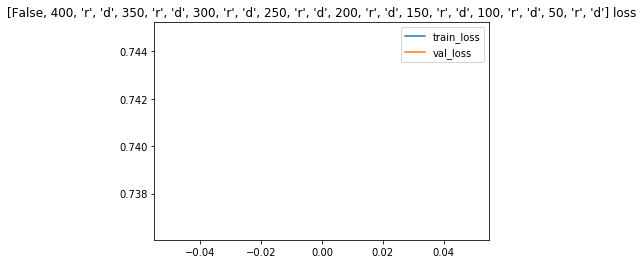

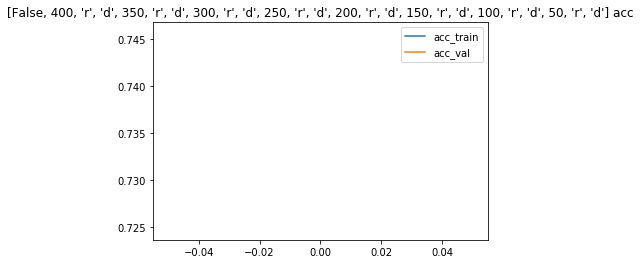

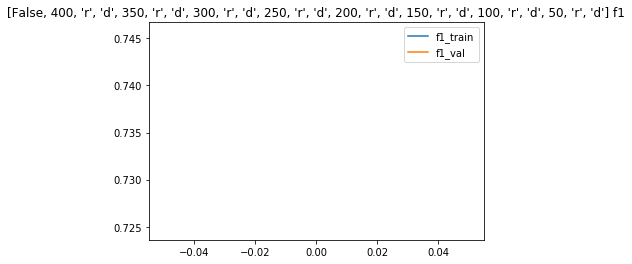


	Epoch 2: train_loss: 0.6503, train_acc: 0.7512, train_micro-f1: 0.7379 || val_loss: 0.6977, val_acc: 0.7679, val_micro-f1: 0.7567
saving results to: blobs/2019-06-14_us1mdeep/


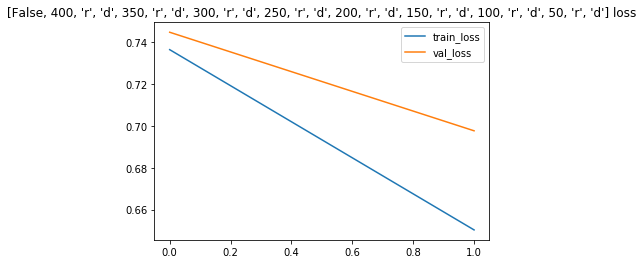

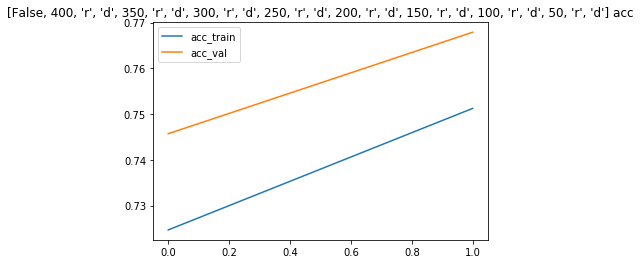

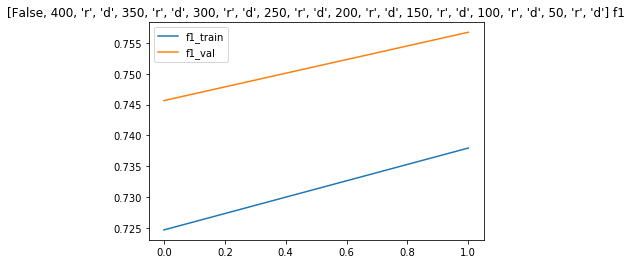

In [0]:
%%time

params = {}
params["trainData"] = "US"
params["testData"] = "DE"
params["epochs"] = 15
params["batchSize"] = 512
params["optimizer"] = tf.train.AdamOptimizer()
params["trainexamples"] = 1000 * 1000
params["architecture"] = [False, 400, 'r', 'd', 350, 'r', 'd', 300, 'r', 'd', 250, 'r', 'd', 200, 'r', 'd', 150, 'r', 'd', 100, 'r', 'd', 50, 'r', 'd']
#params["architecture"] = [False]
params["f1modus"] = "micro"
params["savelog"] = True
params["path"] = "blobs/" + "2019-06-14" + "_us1mdeep/"
#params["path"] = "blobs/test/"
#params["pathToCache"] = "../data/"
    
result = t.trainModel(params)